# SIOC 221A: HW3


In [426]:
import numpy as np 
import matplotlib.pyplot as plt
import netCDF4
import datetime as dt 
import matplotlib.dates as mdates
import pandas as pd 
import xarray as xr 
import scipy

In [428]:
# could also make function for downloading data 

def pd2np(data,var_name,start_num=1): 
    array = np.array(data[var_name][start_num:][:])
    array = np.array([float(vv) for vv in array])
    return array

# variables of interest: wave height, wind speed, & air temp from National Data Buoy Center buoy 46047

wvht = np.array([])
wspd = np.array([])
atmp = np.array([])
wtmp = np.array([])
dates = np.array([])

path = '/home/vboat/Documents/SIO/fall23/sioc221a/week4/'
file = ['buoy46047_year2015.txt', 'buoy46047_year2016.txt']
for f in file: 
    fn = path+f 
    data = pd.read_csv(fn,sep=r'\s+',header=0, na_values=['999.0','99.0','999.00','99.00'])
    variables = data.columns
    # start after column 1 because that includes the units 
    # units = data.row[1]
    yy = data['#YY'][:]; MM = data['MM'][:]; dd = data['DD'][:]; hh = data['hh'][:]; mm = data['mm'][:]
    datetimes = [dt.datetime(year=int(yy[ii]),month=int(MM[ii]),day=int(dd[ii]),hour=int(hh[ii]),minute=int(mm[ii])) for ii in np.arange(1,len(yy))]
    
    
    # now load data
    vars_of_interest = ['WDIR','WSPD','GST','WVHT','PRES','ATMP','WTMP']
    wdir = np.array(data['WDIR'][1:][:]); wdir = np.array([float(vv) for vv in wdir])
    # made into a function after that
    windspeed = pd2np(data,'WSPD',1)
    gust = pd2np(data,'GST',1)
    waveheight = pd2np(data,'WVHT',1)
    pressure = pd2np(data,'PRES',1)
    airtemp = pd2np(data,'ATMP',1)
    watertemp = pd2np(data,'WTMP',1)
    
    wvht = np.append(wvht,waveheight)
    wspd = np.append(wspd,windspeed)
    wtmp = np.append(wtmp,watertemp)
    atmp = np.append(atmp,airtemp)
    dates = np.append(dates,datetimes)
    
df = pd.DataFrame({'dates':dates,'wvht':wvht,'wspd':wspd,'wtmp':wtmp,'atmp':atmp})

In [430]:
data

#YY  MM  DD  hh  mm  WDIR WSPD   GST  WVHT    DPD   APD   MWD    PRES  \
0      #yr  mo  dy  hr  mn  degT  m/s   m/s     m    sec   sec  degT     hPa   
1     2015  12  31  23  50   335  3.7   4.8  1.47  12.90  7.27   297  1018.4   
2     2016  01  01  00  50   345  3.8   4.8  1.58  12.90  7.34   306  1018.6   
3     2016  01  01  01  50   346  4.1   5.1  1.43  12.90  7.28   292  1018.8   
4     2016  01  01  02  50     5  3.0   3.7  1.34  12.12  7.26   293  1018.8   
...    ...  ..  ..  ..  ..   ...  ...   ...   ...    ...   ...   ...     ...   
8700  2016  12  31  18  50   284  5.5   6.8  1.99  13.79  7.38   312  1015.9   
8701  2016  12  31  19  50   303  6.7   8.0  1.82  13.79  7.32   321  1015.1   
8702  2016  12  31  20  50   273  4.8   6.8  1.85  14.81  7.13   316  1014.1   
8703  2016  12  31  21  50   297  7.8  11.1  1.95  13.79  6.96   328  1013.5   
8704  2016  12  31  22  50   303  7.7   9.0  1.81  13.79  6.27   310  1013.4   

      ATMP  WTMP  DEWP  VIS TIDE  
0     degC  degC  degC   mi   ft  
1     14.2  15.7   NaN  NaN  NaN  
2     14.1  15.6   NaN  NaN  NaN  
3     14.3  15.5   NaN  NaN  NaN  
4     14.3  15.4   NaN  NaN  NaN  
...    ...   ...   ...  ...  ...  
8700  14.4  16.5   NaN  NaN  NaN  
8701  14.2  16.5   NaN  NaN  NaN  
8702  13.7  16.5   NaN  NaN  NaN  
8703  13.6  16.5   NaN  NaN  NaN  
8704  12.0  16.5   NaN  NaN  NaN  

[8705 rows x 18 columns]

### The missing data is stored in some weird floats of 99, and 999 - for temperature, it's '999.0'; for visibility, it's '99.0', and for the tide, it's '99.00'. Since the data is stored in a text file, there is no metadata (that I found easily) about the fill_value for missing data, so it would be a bit difficult to identify in the dataset other than by eyeballing. 

#### I did find 1 day that was almost all fill_values by eyeballing through the dataset, revealing that the missing data is filled by some form of 99 or 999 (row is given below): 
2015 01 20 20 50 314  8.4 99.0 99.00 99.00 99.00 999 9999.0 999.0 999.0 999.0 99.0 99.00

## Q1: Visual evaluation. 
#### Plot the time series of wind speed, wave height, water temperature, and air temperature from 46047. 


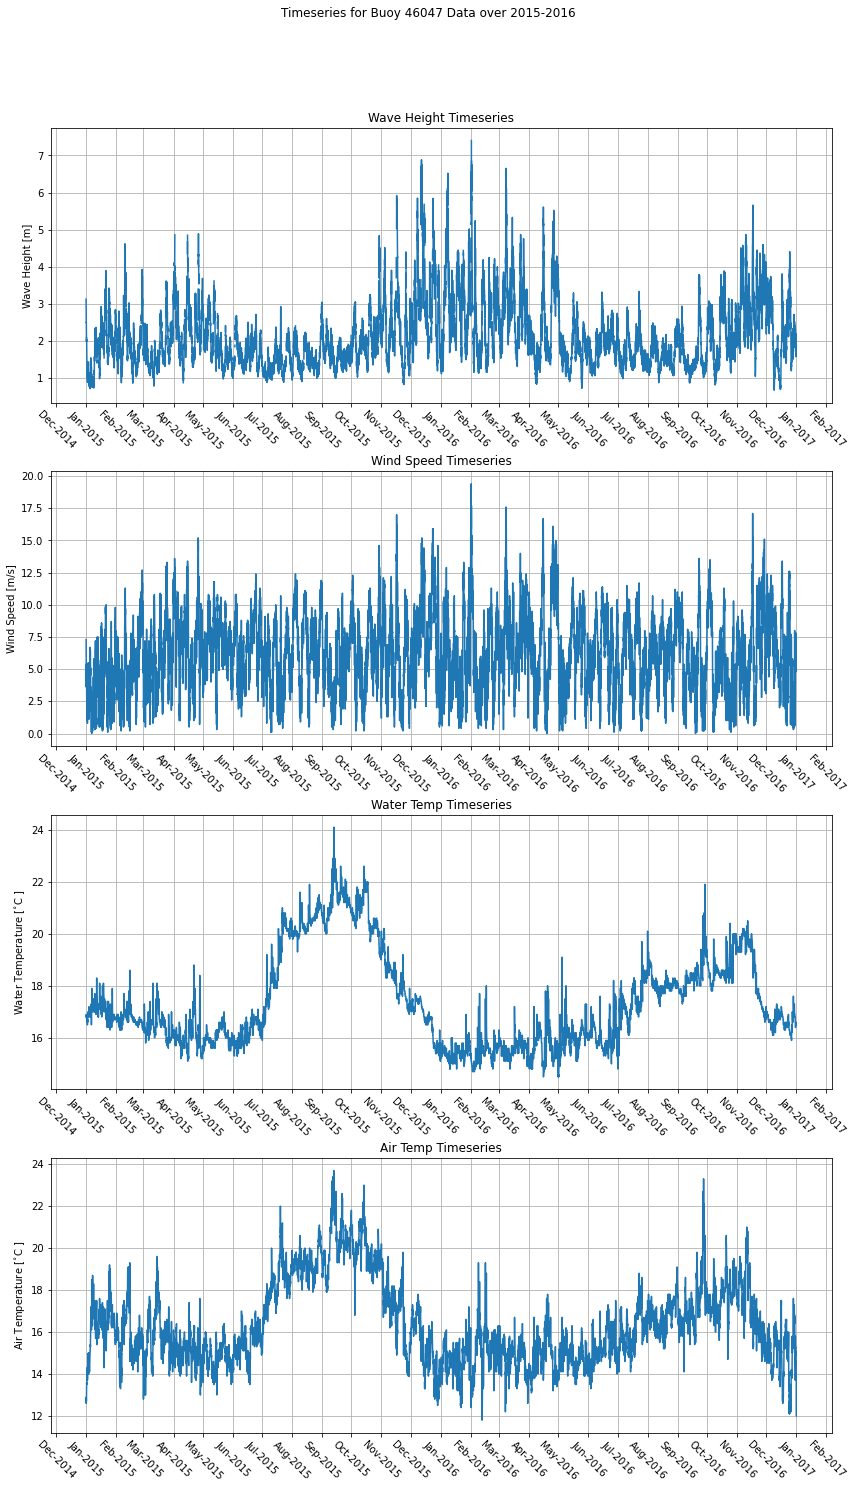

In [431]:
fig,axes = plt.subplots(4,1,figsize=(14,24))
voi = [wvht,wspd,wtmp,atmp] # variables of interest
ylabels = ['Wave Height [m]','Wind Speed [m/s]',r'Water Temperature [$^{\circ}$C ]',r'Air Temperature [$^{\circ}$C ]']
fig.suptitle('Timeseries for Buoy 46047 Data over 2015-2016',y=0.95)
titles = ['Wave Height Timeseries','Wind Speed Timeseries','Water Temp Timeseries','Air Temp Timeseries']
for vv,ax in enumerate(axes): 
    ax.grid()
    ax.plot(dates,voi[vv])
    ax.set_ylabel(ylabels[vv])
    ax.set_title(titles[vv])
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.tick_params(axis='x', labelrotation = -45)

plt.subplots_adjust(hspace=0.25)
plt.show()

## Q2: Monthly means. 
### Average the data to produce monthly means for 2015 and 2016. Plot the means for each month and standard error of the mean. Data are provided at varying frequencies, but consecutive data are not independent. For the purposes of this problem set, let’s assume that the data provide one independent sample every 7 days. 

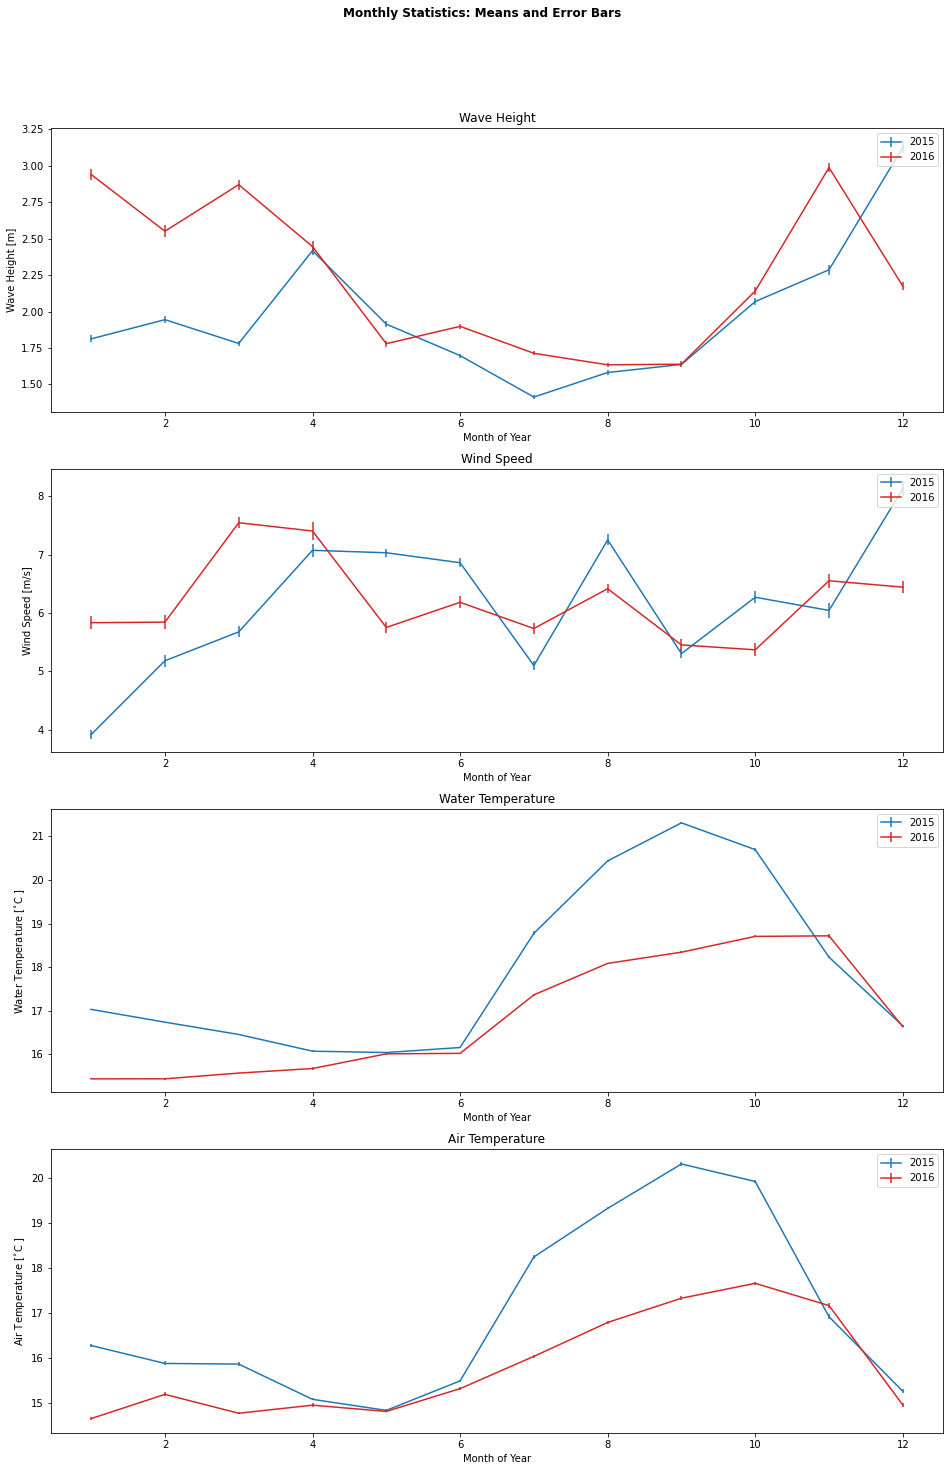

In [434]:
months = np.arange(1,13)

# organize arrays into [wvht, wspd, wtmp, atmp] 
means15 = np.zeros((4,12)); means15[:,:] = np.nan
means16 = np.zeros((4,12)); means16[:,:] = np.nan

err15 = np.zeros((4,12)); err15[:,:] = np.nan
err16 = np.zeros((4,12)); err16[:,:] = np.nan

# was getting some nan values from the scipy calculated sem (standard error of the mean), so doing it myself also
error15 = np.zeros((4,12)); error15[:,:] = np.nan
error16 = np.zeros((4,12)); error16[:,:] = np.nan

for mm in months: 
    # 2015 stats by month: 
    # calculate number of obs per month: 
    N15 = len(df.loc[(df['dates'].dt.month==mm) & (df['dates'].dt.year==2015)])

    # wave height
    means15[0,mm-1] = np.nanmean(df.loc[(df['dates'].dt.month==mm) & (df['dates'].dt.year==2015)]['wvht'])
    err15[0,mm-1] = stats.sem(df.loc[(df['dates'].dt.month==mm) & (df['dates'].dt.year==2015)]['wvht'])
    # this would be me calculating my own error bars without scipy 
    sem = np.std(df.loc[(df['dates'].dt.month==mm) & (df['dates'].dt.year==2015)]['wvht'])/np.sqrt(N15)
    error15[0,mm-1] = sem
    
    # wave speed 
    means15[1,mm-1] = np.nanmean(df.loc[(df['dates'].dt.month==mm) & (df['dates'].dt.year==2015)]['wspd'])
    err15[1,mm-1] = scipy.stats.sem(df.loc[(df['dates'].dt.month==mm) & (df['dates'].dt.year==2015)]['wspd'])
    
    sem = np.std(df.loc[(df['dates'].dt.month==mm) & (df['dates'].dt.year==2015)]['wspd'])/np.sqrt(N15)
    error15[1,mm-1] = sem
    
    # water temp 
    means15[2,mm-1] = np.nanmean(df.loc[(df['dates'].dt.month==mm) & (df['dates'].dt.year==2015)]['wtmp'])
    err15[2,mm-1] = scipy.stats.sem(df.loc[(df['dates'].dt.month==mm) & (df['dates'].dt.year==2015)]['wtmp'])
    sem = np.std(df.loc[(df['dates'].dt.month==mm) & (df['dates'].dt.year==2015)]['wtmp'])/np.sqrt(N15)
    error15[2,mm-1] = sem
    
    # air temp 
    means15[3,mm-1] = np.nanmean(df.loc[(df['dates'].dt.month==mm) & (df['dates'].dt.year==2015)]['atmp'])
    err15[3,mm-1] = scipy.stats.sem(df.loc[(df['dates'].dt.month==mm) & (df['dates'].dt.year==2015)]['atmp'])
    sem = np.std(df.loc[(df['dates'].dt.month==mm) & (df['dates'].dt.year==2015)]['atmp'])/np.sqrt(N15)
    error15[3,mm-1] = sem
    
    # 2016 stats by month: 
    N16 = len(df.loc[(df['dates'].dt.month==mm) & (df['dates'].dt.year==2016)])

    # wave height
    means16[0,mm-1] = np.nanmean(df.loc[(df['dates'].dt.month==mm) & (df['dates'].dt.year==2016)]['wvht'])
    err16[0,mm-1] = scipy.stats.sem(df.loc[(df['dates'].dt.month==mm) & (df['dates'].dt.year==2016)]['wvht'])
    sem = np.std(df.loc[(df['dates'].dt.month==mm) & (df['dates'].dt.year==2016)]['wvht'])/np.sqrt(N16)
    error16[0,mm-1] = sem
    # wave speed 
    means16[1,mm-1] = np.nanmean(df.loc[(df['dates'].dt.month==mm) & (df['dates'].dt.year==2016)]['wspd'])
    err16[1,mm-1] = scipy.stats.sem(df.loc[(df['dates'].dt.month==mm) & (df['dates'].dt.year==2016)]['wspd'])
    sem = np.std(df.loc[(df['dates'].dt.month==mm) & (df['dates'].dt.year==2016)]['wspd'])/np.sqrt(N16)
    error16[1,mm-1] = sem
    # water temp 
    means16[2,mm-1] = np.nanmean(df.loc[(df['dates'].dt.month==mm) & (df['dates'].dt.year==2016)]['wtmp'])
    err16[2,mm-1] = scipy.stats.sem(df.loc[(df['dates'].dt.month==mm) & (df['dates'].dt.year==2016)]['wtmp'])
    sem = np.std(df.loc[(df['dates'].dt.month==mm) & (df['dates'].dt.year==2016)]['wtmp'])/np.sqrt(N16)
    error16[2,mm-1] = sem
    # air temp 
    means16[3,mm-1] = np.nanmean(df.loc[(df['dates'].dt.month==mm) & (df['dates'].dt.year==2016)]['atmp'])
    err16[3,mm-1] = scipy.stats.sem(df.loc[(df['dates'].dt.month==mm) & (df['dates'].dt.year==2016)]['atmp'])
    sem = np.std(df.loc[(df['dates'].dt.month==mm) & (df['dates'].dt.year==2016)]['atmp'])/np.sqrt(N16)
    error16[3,mm-1] = sem


ylabels = ['Wave Height [m]','Wind Speed [m/s]',r'Water Temperature [$^{\circ}$C ]',r'Air Temperature [$^{\circ}$C ]']
titles = ['Wave Height','Wind Speed','Water Temperature','Air Temperature']
   
fig,axes = plt.subplots(4,1,figsize=(16,24))
fig.suptitle('Monthly Statistics: Means and Error Bars',fontweight='bold',y=0.95)
for vv,ax in enumerate(axes): 
    #ax.plot(months,means15[vv,:],color='tab:blue',label='2015')
    #ax.plot(months,means16[vv,:],color='tab:red',label='2016')
    ax.errorbar(months,means15[vv,:],yerr=error15[vv,:],color='tab:blue',label='2015')
    ax.errorbar(months,means16[vv,:],yerr=error16[vv,:],color='tab:red',label='2016')
    ax.set_xlabel('Month of Year')
    ax.set_ylabel(ylabels[vv])
    ax.set_title(titles[vv])
    ax.legend(loc='upper right')

In [438]:
# checking the order of magnitude of errors (and that they all filled, so no nans) 
print(error15)

[[0.02339721 0.02514818 0.01947992 0.02886453 0.0202962  0.01353553
  0.01245303 0.01421221 0.01134513 0.02199235 0.0353006  0.04258335]
 [0.07998496 0.10038648 0.09407376 0.11190519 0.06854457 0.0811751
  0.08392718 0.0956751  0.08416115 0.105263   0.12457237 0.12322761]
 [0.01244628 0.01105635 0.01632832 0.02226892 0.01167754 0.01606104
  0.04885328 0.01510721 0.0256263  0.02747874 0.02761808 0.02606428]
 [0.03961951 0.04455007 0.04239328 0.0256687  0.02227411 0.02591301
  0.04033018 0.0215149  0.04254836 0.03255112 0.05183307 0.04676495]]


## Q3: Least-squares fit. 
### Treating the two years separately, least-squares fit a mean and an annual cycle to the four data records. What is the mean, and what is the amplitude of the annual cycle?
(Total amplitude should be determined from the square root of the sum of the squares of the sine and cosine amplitudes.) Are the fitted coefficients similar for the two years?

2015 Mean from Wave Height fit: 1.0040512546562113 
Linear trend from fit: 0.14916005514847575 
Amplitude of sine:0.6856854841612314 
Amplitude of cosine: 0.2017530378390564


2016 Mean from Wave Height fit: 2.3824174231373156 
Linear trend from fit: -0.023215063603672537 
Amplitude of sine:0.2966178542853637 
Amplitude of cosine: 0.47181024412209904


2015 Mean from Wind Speed fit: 3.3418423748416473 
Linear trend from fit: 0.43284989217152514 
Amplitude of sine:1.4782876989151745 
Amplitude of cosine: -0.7739270535379958


2016 Mean from Wind Speed fit: 5.445294675624503 
Linear trend from fit: 0.11804224173854294 
Amplitude of sine:0.9421133057950399 
Amplitude of cosine: -0.16212285619072198


2015 Mean from Water Temp fit: 19.492138217164666 
Linear trend from fit: -0.24773188218533448 
Amplitude of sine:-3.2646913798820805 
Amplitude of cosine: 0.4715597826856701


2016 Mean from Water Temp fit: 16.35255545132901 
Linear trend from fit: 0.07371328243404207 
Amplitude of sine:-1.3

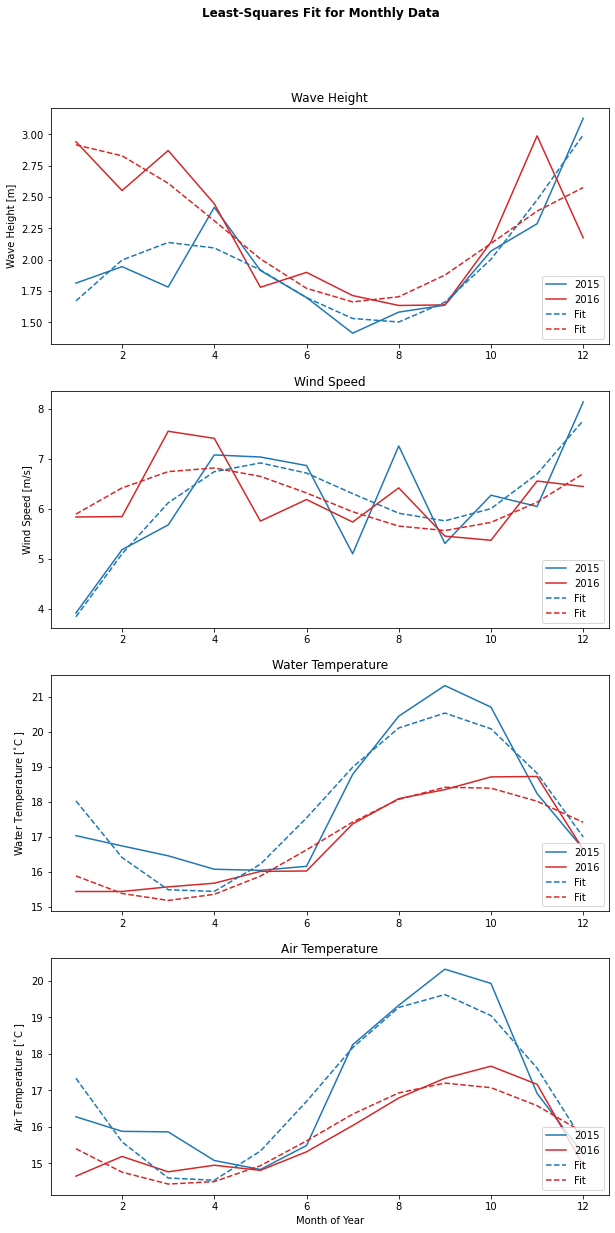

In [497]:
num_months = 12
time = np.arange(1,13) # months

variables = ['Wave Height','Wind Speed','Water Temp','Air Temp']
fit15 = np.zeros((4,12)); fit15[:,:] = np.nan
params15 = np.zeros((4,4)); params15[:,:] = np.nan
fit16 = np.zeros((4,12)); fit16[:,:] = np.nan
params16 = np.zeros((4,4)); params16[:,:] = np.nan

for vv,variable in enumerate(variables): 
    # calculate least squares fit for 2015 data 
    data = means15[vv,:]
    A2 = np.array([np.ones(num_months), time, np.sin(2*np.pi*time/12), np.cos(2*np.pi*time/12) ]).T
    x = np.dot(np.linalg.inv(np.dot(A2.T, A2)), np.dot(A2.T, data))
    fit = np.dot(A2, x)
    
    # save 
    fit15[vv,:] = fit
    params15[vv,:] = x
    
    print(f'2015 Mean from {variable} fit: {x[0]} \nLinear trend from fit: {x[1]} \nAmplitude of sine:{x[2]} \nAmplitude of cosine: {x[3]}')
    print('\n')
    # calculate least squares fit for 2016 data 
    data = means16[vv,:]
    A2 = np.array([np.ones(num_months), time, np.sin(2*np.pi*time/12), np.cos(2*np.pi*time/12) ]).T
    x = np.dot(np.linalg.inv(np.dot(A2.T, A2)), np.dot(A2.T, data))
    fit = np.dot(A2, x)
    
    # save 
    fit16[vv,:] = fit
    params16[vv,:] = x
    
    print(f'2016 Mean from {variable} fit: {x[0]} \nLinear trend from fit: {x[1]} \nAmplitude of sine:{x[2]} \nAmplitude of cosine: {x[3]}')
    print('\n')
    
    
ylabels = ['Wave Height [m]','Wind Speed [m/s]',r'Water Temperature [$^{\circ}$C ]',r'Air Temperature [$^{\circ}$C ]']
titles = ['Wave Height','Wind Speed','Water Temperature','Air Temperature']
   
fig,axes = plt.subplots(4,1,figsize=(10,20))
fig.suptitle('Least-Squares Fit for Monthly Data',fontweight='bold',y=0.95)
for vv,ax in enumerate(axes): 
    ax.plot(months,means15[vv,:],color='tab:blue',label='2015')
    ax.plot(months,means16[vv,:],color='tab:red',label='2016')
    ax.plot(months,fit15[vv,:],color='tab:blue',linestyle='--',label='Fit')
    ax.plot(months,fit16[vv,:],color='tab:red',linestyle='--',label='Fit')
    if vv==3: 
        ax.set_xlabel('Month of Year')
        
    ax.set_ylabel(ylabels[vv])
    ax.set_title(titles[vv])
    ax.legend(loc='lower right')

In [357]:
A=np.array([[np.ones((1,num_months))], [np.cos(xx).T/num_months], [np.sin(xx).T/num_months]],dtype=np.float64)
print(A)
A.T.shape

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (3, 1) + inhomogeneous part.

In [450]:
A = np.array([np.ones(num_months), time]).T
temperature = temperature.reshape([nt, 1])
x = np.dot(inv(np.dot(A.T, A)), np.dot(A.T, temperature))
fit = np.dot(A, x)
print('Mean from fit:', x[0][0], 'Linear trend from fit:', x[1][0]

(12, 12)

In [486]:
fit.shape

(12,)

In [480]:
x

array([1.00405125, 0.14916006, 0.68568548, 0.20175304])

In [481]:
xx = means15[0,:]
tt = np.arange(1,13)
A2 = np.array([np.ones(num_months), tt, np.sin(2*np.pi*tt/12), np.cos(2*np.pi*tt/12) ]).T
x = np.dot(np.linalg.inv(np.dot(A2.T, A2)), np.dot(A2.T, xx))
fit = np.dot(A2, x)
print('Mean from fit:', x[0], '\nLinear trend from fit:', x[1],
'\nAmplitude of sine:', x[2],'\nAmplitude of cosine:', x[3])



Mean from fit: 1.0040512546562113 
Linear trend from fit: 0.14916005514847575 
Amplitude of sine: 0.6856854841612314 
Amplitude of cosine: 0.2017530378390564


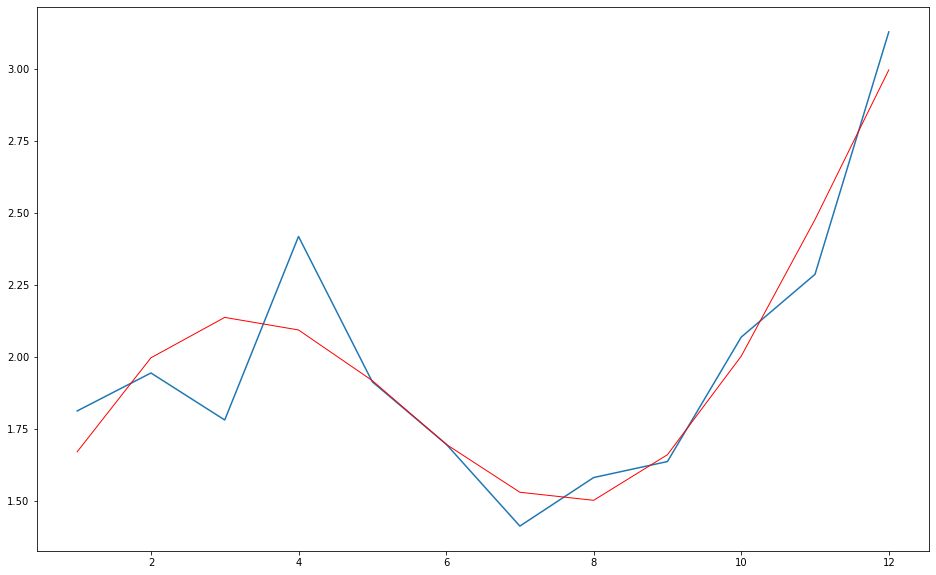

In [485]:
fig,ax = plt.subplots(figsize=((16,10)))
ax.plot(tt, xx, label = 'data')
ax.plot(tt, fit, 'r', lw=1, label = 'Fit')

In [471]:
xx = np.array(means15[0,:]);
arr1 = np.ones((12))
arr2 = np.cos(xx).T/num_months
arr3 = np.sin(xx).T/num_months
fit15 = np.concatenate([[arr1], [arr2], [arr3]], axis=0)

# transform fit matrix and compute dot product for square matrix (A'*A)
sqfit15 = np.dot(fit15.T, fit15)
# inverse of square fit matrix 
inverse = np.linalg.inv(sqfit15)
# dot matrix of fit * data 
data_dot = np.dot(fit15.T,xx.reshape(-1, 1))
x15 = np.dot(inverse, data_dot)

ValueError: shapes (12,3) and (12,1) not aligned: 3 (dim 1) != 12 (dim 0)

In [454]:
num_months = 12
xx = np.arange(1,num_months)
A=np.array([[np.ones((1,num_months))], [np.array(np.cos(xx).T/num_months)], [np.array(np.sin(xx).T/num_months)]])

variables = ['Wave Height','Wind Speed','Water Temp','Air Temp']
#fit15 = np.zeros((4,12)); fit15[:,:] = np.nan
#fit16 = np.zeros((4,12)); fit16[:,:] = np.nan

for vv,variable in enumerate(variables): 
    xx = np.array(means15[vv,:]);
    arr1 = np.ones((num_months))
    arr2 = np.cos(xx).T/num_months
    arr3 = np.sin(xx).T/num_months
    fit15 = np.concatenate([[arr1], [arr2], [arr3]], axis=0)
    
    # transform fit matrix and compute dot product for square matrix (A'*A)
    squarefit15 = np.dot(fit15.T, fit15)
    # inverse of square fit matrix 
    inverse = np.linalg.inv(squarefit15)
    # dot matrix of fit * data 
    data_dot = np.dot(fit15.T,means15[vv,:])
    x15 = np.dot(inverse, data_dot)
    

A = np.random.rand(3, 12)  # Replace with your actual A
data = np.random.rand(1, 12)  # Replace with your actual data

# Calculate A^T * A
ATA = np.dot(A.T, A)

# Calculate A^T * data
AT_data = np.dot(A.T, data.T)

# Calculate the inverse of ATA
inverse_ATA = np.linalg.inv(ATA)

# Compute x2 using the equation x2 = inv(A^T * A) * A^T * data
x2 = np.dot(inverse_ATA, AT_data)

    
fig,ax = plt.subplots(1,1)
ax.plot(months,means15[0,:])
ax.plot(months,fit15*x15)
    


/tmp/ipykernel_207086/884766039.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  A=np.array([[np.ones((1,num_months))], [np.array(np.cos(xx).T/num_months)], [np.array(np.sin(xx).T/num_months)]])


ValueError: shapes (12,3) and (12,) not aligned: 3 (dim 1) != 12 (dim 0)

In [425]:
squarefit15

array([[ 0.00694444,  0.00688426,  0.00694103,  0.00571057,  0.00690893,
         0.00689874,  0.00639772,  0.00675989,  0.00683772,  0.00671789,
         0.0061787 ,  0.00175693],
       [ 0.00688426,  0.00694444,  0.00685226,  0.00618018,  0.0069412 ,
         0.00673445,  0.00598747,  0.00649239,  0.00661914,  0.00689079,
         0.00654159,  0.0026243 ],
       [ 0.00694103,  0.00685226,  0.00694444,  0.00558381,  0.00688353,
         0.00692029,  0.00647928,  0.00680644,  0.0068724 ,  0.00665941,
         0.00607623,  0.00154534],
       [ 0.00571057,  0.00618018,  0.00558381,  0.00694444,  0.00608048,
         0.00522034,  0.00372415,  0.00465386,  0.00493269,  0.00652536,
         0.00688469,  0.00526776],
       [ 0.00690893,  0.0069412 ,  0.00688353,  0.00608048,  0.00694444,
         0.00678311,  0.00609221,  0.00656469,  0.00668026,  0.00686124,
         0.00646728,  0.00242653],
       [ 0.00689874,  0.00673445,  0.00692029,  0.00522034,  0.00678311,
         0.00694444,  

In [338]:
num_months = 12
xx = np.arange(1,num_months)
A=np.array([[np.ones((1,num_months))], [np.array(np.cos(xx).T/num_months)], [np.array(np.sin(xx).T/num_months)]])

variables = ['Wave Height','Wind Speed','Water Temp','Air Temp']
fit15 = np.zeros((4,12)); fit15[:,:] = np.nan
fit16 = np.zeros((4,12)); fit16[:,:] = np.nan

for vv,variable in enumerate(variables): 
    xx = np.array(means15[vv,:]);
    arr1 = np.zeros((num_months))
    arr2 = np.cos(xx).T/num_months
    arr3 = np.sin(xx).T/num_months
    fit15 = np.concatenate([[arr1], [arr2], [arr3]], axis=0)
    
    x15 = np.linalg.inv(fit15.T*fit15[vv,:])*fit15[vv,:].T*means15[vv,:]


xx = np.array(means15[0,:]);
fit15=np.array([[np.ones((1,num_months))], [np.cos(xx).T/num_months], [np.sin(xx).T/num_months]])

# numpy inverse: np.linalg.inv()
x15 = np.linalg.inv(fit15.T*fit15)*fit15.T*means15[0,:]

xx = means16[0,:];
fit16=np.array([[np.ones((1,num_months))], [np.cos(xx).T/num_months], [np.sin(xx).T/num_months]])



fig,ax = plt.subplots(1,1)
ax.plot(months,means15[0,:])
ax.plot(months,fit15*x15)

'''
A2=[ones(length(time),1) sin(2*pi*time/P) ...
    cos(2*pi*time/P) sin(2*pi*time/P1) cos(2*pi*time/P1)];
x2=inv(A2'*A2)*A2'*data;
plot(time,data,time,A2*x2,'m','LineWidth',2)
'''

/tmp/ipykernel_207086/3276856702.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  A=np.array([[np.ones((1,num_months))], [np.cos(xx).T/num_months], [np.sin(xx).T/num_months]])
/tmp/ipykernel_207086/3276856702.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fit15=np.array([[np.ones((1,num_months))], [np.cos(xx).T/num_months], [np.sin(xx).T/num_months]])


UFuncTypeError: Cannot cast ufunc 'inv' input from dtype('O') to dtype('float64') with casting rule 'same_kind'

In [315]:
num_months = 12
xx = np.arange(1,num_months)
A=np.array([np.ones((num_months,1)), np.cos(xx).T/num_months, np.sin(xx).T/num_months])

xx = np.array(means15[0,:]);
fit15=np.array([np.ones((num_months,1)), np.cos(xx).T/num_months, np.sin(xx).T/num_months])


xx = means16[0,:];
fit15=np.array([np.ones((num_months,1)), np.cos(xx).T/num_months, np.sin(xx).T/num_months])


time=pier.dnum; %units of days
data=pier.temperature;
P=12.42/24; %semidiurnal
P1=1;  %diurnal


%size(pier.pressure)
A2=[ones(length(time),1) sin(2*pi*time/P) ...
    cos(2*pi*time/P) sin(2*pi*time/P1) cos(2*pi*time/P1)];
x2=inv(A2'*A2)*A2'*data;
plot(time,data,time,A2*x2,'m','LineWidth',2)
datetick

/tmp/ipykernel_207086/2745872558.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  A=np.array([np.ones((num_months,1)), np.cos(xx).T/num_months, np.sin(xx).T/num_months])
/tmp/ipykernel_207086/2745872558.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fit15=np.array([np.ones((num_months,1)), np.cos(xx).T/num_months, np.sin(xx).T/num_months])


ValueError: could not broadcast input array from shape (12,1) into shape (12,)

In [ ]:

fig,axes = plt.subplots(4,1,figsize=(16,24))
fig.suptitle('Monthly Statistics: Means and Error Bars',fontweight='bold',y=0.95)
for vv,ax in enumerate(axes): 
    #ax.plot(months,means15[vv,:],color='tab:blue',label='2015')
    #ax.plot(months,means16[vv,:],color='tab:red',label='2016')
    ax.errorbar(months,means15[vv,:],yerr=err15[vv,:],color='tab:blue',label='2015')
    ax.errorbar(months,means16[vv,:],yerr=err16[vv,:],color='tab:red',label='2016')
    ax.set_xlabel('Month of Year')
    ax.set_ylabel(ylabels[vv])
    ax.set_title(titles[vv])
    ax.legend(loc='upper right')

In [235]:
num_months = 12
xx = np.arange(1,num_months)



A=np.array([np.ones((num_months,1)), np.cos(xx).T/num_months, np.sin(xx).T/num_months])

# solution for fitting 5 values
inv(A'*A)*A'*x

% solution for fitting 3 values, with low frequency sine and cosine
inv(A(:,1:3)'*A(:,1:3))*A(:,1:3)'*x

% solution for fitting 3 values, with higher frequency sine and cosine
inv(A(:,[1 4:5])'*A(:,[1 4:5]))*A(:,[1 4:5])'*x


AttributeError: Can only use .dt accessor with datetimelike values

Least-squares fit. Treating the two years separately, least-squares fit a mean
and an annual cycle to the four data records. What is the mean, and what is the
amplitude of the annual cycle? (Total amplitude should be determined from the
square root of the sum of the squares of the sine and cosine amplitudes.) Are the
fitted coefficients similar for the two years?
4. Least-squares fit a semi-annual cycle. Augment your annual cycle least-
squares fit with a semi-annual cycle. What is the amplitude of the semi-annual
cycle? Does the augmented fit give you a different annual cycle?
5. χ2 and the misfit. What is the squared misfit of your least-squares fits? You can
compute this as
χ2 =
N∑
i=1
(yi − ∑M
j=1 aij xj )2
σ2
i
∼ N − M. (1)
In other words, the misfit for each point should be roughly equal to the uncertainty.
We lose a degree of freedom for each function that we use to fit. How mu

In [234]:
mean10 = np.nanmean(t10)
std10 = np.std(t10)

mean20 = np.nanmean(t20)
std20 = np.std(t20)

print(f'2010 Temperature Mean is {mean10: .4f} deg C with standard deviation of {std10: .4f}')
print(f'2020 Temperature Mean is {mean20: .4f} deg C with standard deviation of {std20: .4f}')

# within error bars? 

# calculate myself: 
# variance: sig^2 = sum( ( a_i * (xi - mu_i)^2)
# standard error of the mean: sig = sig/sqrt(N)

sum10 = 0; N10 = 0; # sum10 = sig^2 and N is number of observations
for val in t10: 
    sig = abs(val-mean10)
    sig2 = np.power(sig,2)
    sum10 = sum10 + sig2
    N10 = N10 + 1
    

sum20 = 0; N20 = 0;
for val in t20: 
    sig = abs(val-mean20)
    sig2 = np.power(sig,2)
    sum20 = sum20 + sig2
    N20 = N20 + 1
    

var10 = sum10/N10; sig10 = np.sqrt(sum10)/np.sqrt(N10)
var20 = sum20/N20; sig20 = np.sqrt(sum20)/np.sqrt(N20)


print(f'2010 variance = {var10: .4f} and std error from mean = {sig10: .4f}')
print(f'2020 variance = {var20: .4f} and std error from mean = {sig20: .4f}')



2010 Temperature Mean is  16.5155 deg C with standard deviation of  1.9303
2020 Temperature Mean is  17.7528 deg C with standard deviation of  2.5519
2010 variance =  3.7261 and std error from mean =  1.9303
2020 variance =  6.5122 and std error from mean =  2.5519


In [235]:
y = 0
if mean10+std10 >= mean20 and mean10-std10 <= mean20: 
    # this means that 2020 mean falls inside 2010 error bars 
    print('2020 within 2010 error bars')
    y = y + 1
else: 
    print('2020 outside of 2010 error bars')


if mean20+std20 >= mean10 and mean20-std20 <= mean10: 
    # this means that 2010 mean falls inside 2020 error bars 
    print('2010 within 2020 error bars')
    y = y + 1
else: 
    print('2010 outside of 2020 error bars')

if y == 2: 
    print('Sample means are consistent')
elif y < 2: 
    print('Sample means are not consistent')

2020 within 2010 error bars
2010 within 2020 error bars
Sample means are consistent


In [283]:
# subsample data 
## note: the way I subsample selects the first measurement of the day, and since they are organized by time collected, the data will be biased in this way 
# (early in day data saved in sampling)

subsampler = np.array([])
subdays10 = np.array([]) # this will be an array tracking the dates (1 obs per day)
sub10 = np.array([]) # this array will track the subsampled temp measurements

for nn,dd in enumerate(d10):
    # loop through all dates in the data
    date_finder = dt.datetime(dd.year,dd.month,dd.day)
    if date_finder not in subsampler: 
        # if encountering a new day, then will enter this loop
        subsampler = np.append(subsampler, date_finder)
        subdays10 = np.append(subdays10,dd) # saving new days in array
        sub10 = np.append(sub10,t10[nn]) # saving the temp measurement of that index (aka, the first temp measurement on that day) in subsampled dataset

# calculate mean & stdev 
sub10mean = np.nanmean(sub10)
sub10std = np.std(sub10)

# same thing for 2020 data subsampling 

subsampler = np.array([])
subdays20 = np.array([]) # dates of subsampling
sub20 = np.array([]) # temps of subsampling

for nn,dd in enumerate(d20):
    # loop through all dates in the data
    date_finder = dt.datetime(dd.year,dd.month,dd.day)
    if date_finder not in subsampler: 
        # if encountering a new day, then will enter this loop
        subsampler = np.append(subsampler, date_finder)
        subdays20 = np.append(subdays20,dd) # saving new days in array
        sub20 = np.append(sub20,t20[nn]) # saving the temp measurement of that index (aka, the first temp measurement on that day) in subsampled dataset

# calculate mean & stdev 
sub20mean = np.nanmean(sub20)
sub20std = np.std(sub20)



In [287]:
# check the saved subsampling is actually a subsampling: 
print(subdays10)
print(subdays20)
print(f'Number of subsampled observations in 2010: {len(subdays10)}')
print(f'Number of subsampled observations in 2020: {len(subdays20)}')

[datetime.datetime(2010, 1, 1, 0, 7, 25)
 datetime.datetime(2010, 1, 2, 0, 7, 25)
 datetime.datetime(2010, 1, 3, 0, 7, 25)
 datetime.datetime(2010, 1, 4, 0, 7, 25)
 datetime.datetime(2010, 1, 5, 0, 7, 25)
 datetime.datetime(2010, 1, 6, 0, 7, 25)
 datetime.datetime(2010, 1, 7, 0, 7, 25)
 datetime.datetime(2010, 1, 8, 0, 7, 25)
 datetime.datetime(2010, 1, 9, 0, 7, 25)
 datetime.datetime(2010, 1, 10, 0, 7, 25)
 datetime.datetime(2010, 1, 11, 0, 7, 25)
 datetime.datetime(2010, 1, 12, 0, 7, 25)
 datetime.datetime(2010, 1, 13, 0, 7, 25)
 datetime.datetime(2010, 1, 14, 0, 7, 25)
 datetime.datetime(2010, 1, 15, 0, 7, 25)
 datetime.datetime(2010, 1, 16, 0, 7, 25)
 datetime.datetime(2010, 1, 17, 0, 7, 25)
 datetime.datetime(2010, 1, 19, 17, 35, 25)
 datetime.datetime(2010, 1, 20, 0, 3, 25)
 datetime.datetime(2010, 1, 21, 0, 3, 25)
 datetime.datetime(2010, 1, 22, 0, 3, 25)
 datetime.datetime(2010, 1, 23, 0, 3, 25)
 datetime.datetime(2010, 1, 24, 0, 3, 25)
 datetime.datetime(2010, 1, 25, 0, 3, 25)

In [288]:

print(f'Subsampled 2010 mean: {sub10mean: .2f} +/- {sub10std: .2f} deg C\n versus full dataset 2010 mean of {mean10: .2f} +/- {std10: .2f} deg C')
print(f'Subsampled 2020 mean: {sub20mean: .2f} +/- {sub20std: .2f} deg C \n versus full dataset 2020 mean of {mean20: .2f} +/- {std20: .2f} deg C')

y = 0


if mean10+std10 >= sub10mean and mean10-std10 <= sub10mean: 
    # this means that full mean falls inside subsample error bars 
    print('2010 Subsampling within Full Dataset Error Bars')
    y = y + 1
else: 
    print('2010 Subsampling outside of Full Dataset Error Bars')


if mean20+std20 >= sub20mean and mean20-std20 <= sub20mean: 
    # this means that full mean falls inside subsample error bars 
    print('2020 Subsampling within Full Dataset Error Bars')
    y = y + 1
else: 
    print('2020 Subsampling outside of Full Dataset Error Bars')

if y > 2: 
    print('Subsample means are consistent')
elif y < 2: 
    print('Subsample means are not consistent')


Subsampled 2010 mean:  16.90 +/-  1.96 deg C
 versus full dataset 2010 mean of  16.52 +/-  1.93 deg C
Subsampled 2020 mean:  18.36 +/-  2.62 deg C 
 versus full dataset 2020 mean of  17.75 +/-  2.55 deg C
2010 Subsampling within Full Dataset Error Bars
2020 Subsampling within Full Dataset Error Bars


#### Yes - the subsampled means are different, but they still fall within the error bars of the full dataset. 

## Q3: Variance
### For each quantity, evaluate whether the variance from the two years are consistent. Do you obtain different results if you subsample the data at (say) once per day?

In [290]:
# found variance previously for full dataset (see above)


sum_sub10 = 0; S10 = 0; # sum10 = sig^2 and N is number of observations
for val in sub10: 
    sig = abs(val-sub10mean)
    sig2 = np.power(sig,2)
    sum_sub10 = sum_sub10 + sig2
    S10 = S10 + 1

sum_sub20 = 0; S20 = 0;
for val in sub20: 
    sig = abs(val-sub20mean)
    sig2 = np.power(sig,2)
    sum_sub20 = sum_sub20 + sig2
    S20 = S20 + 1
    

var_sub10 = sum_sub10/S10; sig_sub10 = np.sqrt(sum_sub10)/np.sqrt(S10)
var_sub20 = sum_sub20/S20; sig_sub20 = np.sqrt(sum_sub20)/np.sqrt(S20)


print(f'2010 variance = {var10: .3f} and std error from mean = {sig10: .3f}')
print(f'2020 variance = {var20: .3f} and std error from mean = {sig20: .3f}')


print(f'Subsampled 2010 variance = {var_sub10: .3f} and std error from mean = {sig_sub10: .3f}')
print(f'Subsampled 2020 variance = {var_sub20: .3f} and std error from mean = {sig_sub20: .3f}')




2010 variance =  3.726 and std error from mean =  1.930
2020 variance =  6.512 and std error from mean =  2.552
Subsampled 2010 variance =  3.840 and std error from mean =  1.960
Subsampled 2020 variance =  6.845 and std error from mean =  2.616


#### The variance and standard error of the subsampled data is greater than the full dataset, but not by much. Intuitively, this makes sense because there is less data so the mean is constrained with less information. 

## Q4: Extreme values 

### For each of the two years, compute the likelihood given the observed PDF, and a Gaussian PDF with the observed variance, of a temperature extreme value 3σ greater than the mean



In [195]:
# let's start by finding what an extreme value (3*sigma) would look like 

# for 2010 dataset: 

extreme10 = 3*sig10 + mean10
extreme20 = 3*sig20 + mean20

print(f'Extreme value for 2010 Dataset is: {extreme10: .3f} deg C')
print(f'Extreme value for 2020 Dataset is: {extreme20: .3f} deg C')

Extreme value for 2010 Dataset is:  22.306 deg C
Extreme value for 2020 Dataset is:  25.408 deg C


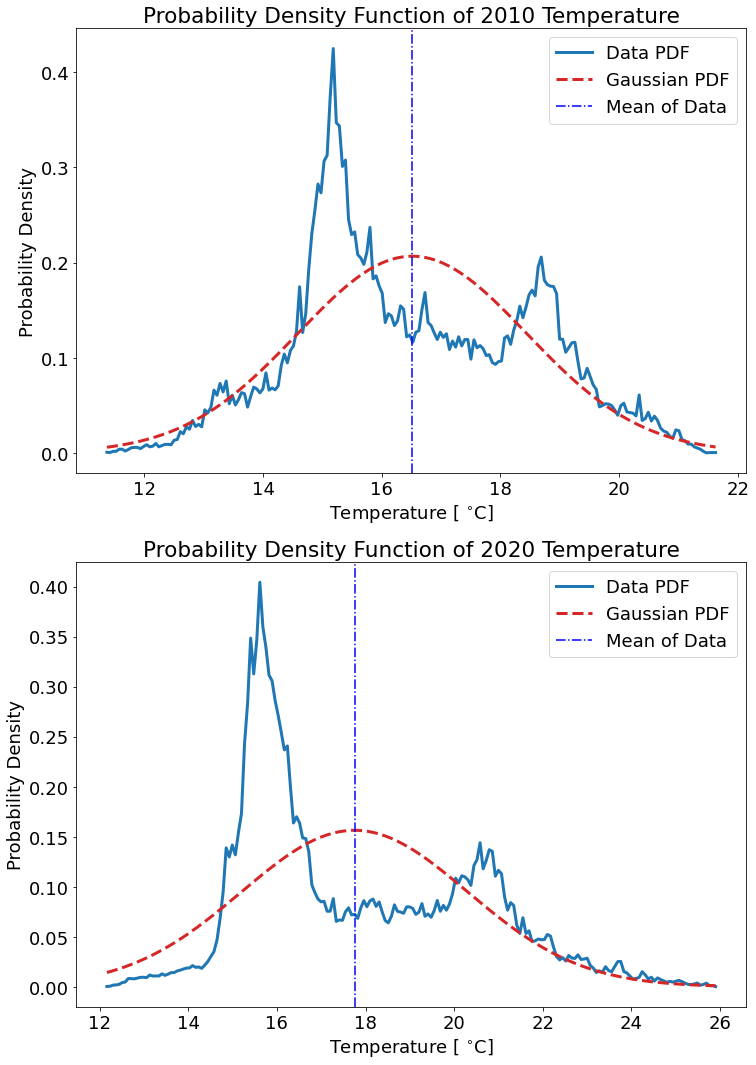

Sum of 2010 PDF = 0.9999999999999998
Sum of 2020 PDF = 1.0
Sum of 2010 Gaussian PDF = 0.992438018321991
Sum of 2020 Gaussian PDF = 0.9855733513832092


In [309]:
# make a PDF, and then a Gaussian PDF 

nbins = 200
[bin10,bin10_edges] = np.histogram(t10,bins=nbins)
[bin20,bin20_edges] = np.histogram(t20,bins=nbins)

# total number of observations 
N10 = sum(bin10) # number of observations in 2010 dataset
N20 = sum(bin20) # number of observations in 2020 dataset

# distance between bins
d10 = bin10_edges[1:]-bin10_edges[0:-1]; d10 = np.nanmean(d10)
d20 = bin20_edges[1:]-bin20_edges[0:-1]; d20 = np.nanmean(d20)

# midpoint values of each bin (deg C) 
mid10 = (bin10_edges[1:]+bin10_edges[0:-1])/2
mid20 = (bin20_edges[1:]+bin20_edges[0:-1])/2

pdf10 = bin10/N10/d10
pdf20 = bin20/N20/d20

gaus10 = (1/sig10/np.sqrt(2*np.pi)) * (np.exp(-(mid10-mean10)**2 / (2*sig10**2)))
gaus20 = (1/sig20/np.sqrt(2*np.pi)) * (np.exp(-(mid20-mean20)**2 / (2*sig20**2)))

year_strings = ['2010','2020']
x = [mid10,mid20]
y = [pdf10,pdf20]
yg = [gaus10,gaus20]
mu = [mean10,mean20]
fig,axes = plt.subplots(2,1,figsize=(12,18))
for n,ax in enumerate(axes): 
    ax.set_title(f'Probability Density Function of {year_strings[n]} Temperature')
    ax.plot(x[n],y[n],color='tab:blue',label='Data PDF',linewidth=3)
    ax.plot(x[n],yg[n],color='tab:red',linestyle='--',label='Gaussian PDF',linewidth=3)
    ax.set_xlabel(r'Temperature [ $^{\circ} $C]'); ax.set_ylabel('Probability Density')
    ax.axvline(mu[n],color='blue',linestyle='-.',label='Mean of Data')
    ax.legend()

plt.show()

# check that all of the PDF integrals go to 1 
# check: PDF must add to 1
print(f'Sum of 2010 PDF = {np.sum(pdf10)*d10}')
print(f'Sum of 2020 PDF = {np.sum(pdf20)*d20}')

print(f'Sum of 2010 Gaussian PDF = {np.sum(gaus10)*d10}')
print(f'Sum of 2020 Gaussian PDF = {np.sum(gaus20)*d20}')

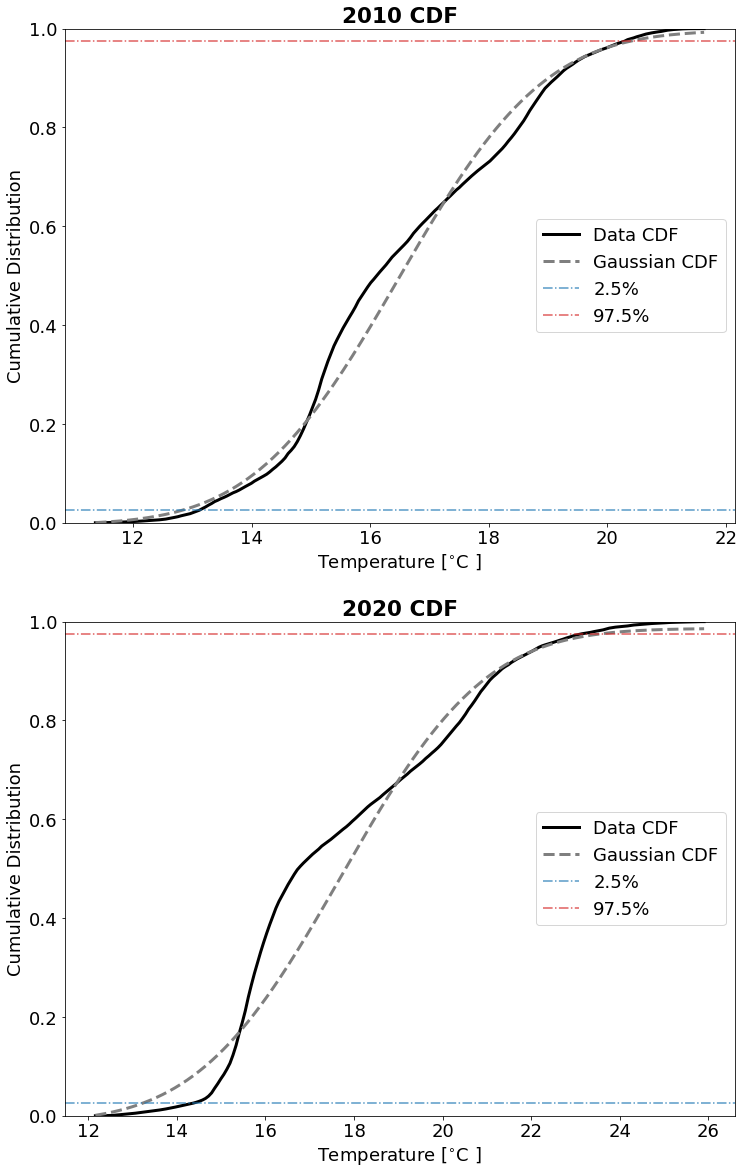

In [318]:
# calculating CDF: integral of PDF 
# therefore: CDF = \int_a ^b PDF(T) dT = (b-a) * ((PDF(a)+PDF(b))/2)

# cumulative distribution function is the integral of the PDF 
# so: cdf = dbin * (PDF(a)+PDF(b))/2
cdf10 = np.cumsum(pdf10)*d10
cdf20 = np.cumsum(pdf20)*d20

# gaussian CDF 
gc10 = np.cumsum(gaus10)*d10
gc20 = np.cumsum(gaus20)*d20

plt.rcParams['font.size'] = 18

year_strings = ['2010','2020']
x = [mid10,mid20]
y = [cdf10,cdf20]
gy = [gc10,gc20]
fig,axes = plt.subplots(2,1,figsize=(12,20))
for n,ax in enumerate(axes): 
    ax.set_title(f'{year_strings[n]} CDF',fontweight='bold')
    ax.plot(x[n],y[n],color='black',linewidth=3,label='Data CDF')
    ax.plot(x[n],gy[n],color='tab:gray',linewidth=3,linestyle='--',label='Gaussian CDF')
    ax.axhline(y=0.025,color='tab:blue',alpha=0.75,linestyle='-.',label='2.5%')
    ax.axhline(y=0.975,color='tab:red',alpha=0.75,linestyle='-.',label='97.5%')
    ax.set_ylim([0,1])
    ax.set_xlabel(r'Temperature [$^{\circ}$C ]')
    ax.set_ylabel('Cumulative Distribution')
    ax.legend(loc='best')
    
plt.show()

In [329]:
# evaluate CDF at 3*sigma

def ind_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

idx10 = ind_nearest(mid10,extreme10)
prob_ex10 = pdf10[idx10]
gaus_ex10 = gaus10[idx10]

idx20 = ind_nearest(mid20,extreme20)
prob_ex20 = pdf20[idx20]
gaus_ex20 = gaus20[idx20]


print('Real Data PDF:')
# print(prob_ex10)
print(f'Likelihood of finding 3*sigma greater than mean for 2010: {prob_ex10*100: 0.8f} %')

# print(prob_ex20)
print(f'Likelihood of finding 3*sigma greater than mean for 2020: {prob_ex20*100: .8f} %')

print('\n')

print('Gaussian PDF:')
# print(prob_ex10)
print(f'Likelihood of finding 3*sigma greater than mean for 2010: {gaus_ex10*100: 0.8f} %')

# print(prob_ex20)
print(f'Likelihood of finding 3*sigma greater than mean for 2020: {gaus_ex20*100: .8f} %')


Real Data PDF:
Likelihood of finding 3*sigma greater than mean for 2010:  0.03185368 %
Likelihood of finding 3*sigma greater than mean for 2020:  0.26649552 %


Gaussian PDF:
Likelihood of finding 3*sigma greater than mean for 2010:  0.61887698 %
Likelihood of finding 3*sigma greater than mean for 2020:  0.17165564 %


## Q5: Probability Density Functions
### For both pressure and temperature, plot the pdfs for the two years on the same axes. Overplot the Gaussian and uniform distributions that have the observed mean and variance.


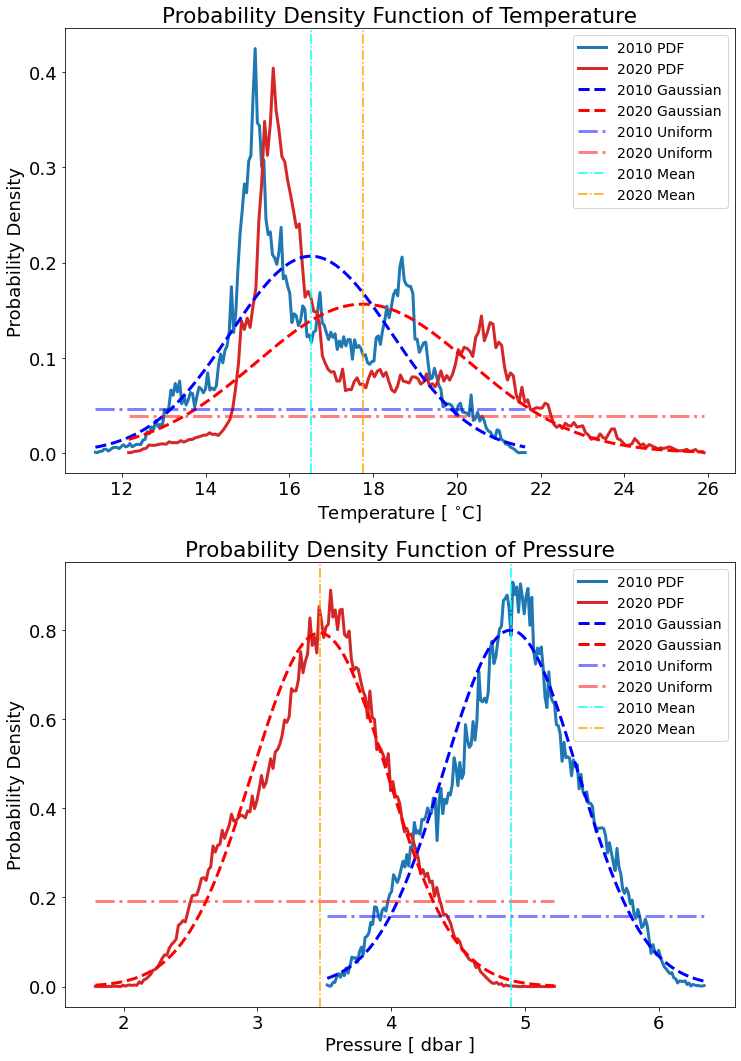

In [353]:
# make a PDF, and then a Gaussian PDF, and then uniform distribution PDF

def data_PDF(data,nbins): 
    import numpy as np 
    [num_per_bin, bin_edges] = np.histogram(data,bins=nbins)
    N = sum(num_per_bin)
    dbin = bin_edges[1:]-bin_edges[0:-1]; dbin = np.nanmean(dbin)
    mid_bins = (bin_edges[0:-1]+bin_edges[1:])/2
    pdf = num_per_bin/N/dbin
    return N, mid_bins, pdf

def get_stats(data): 
    import numpy as np 
    m = np.nanmean(data)
    stdev = np.std(data)
    return m,stdev 

nbins = 200
[N_t10,mid_t10,pdf_t10] = data_PDF(t10,nbins)
[N_t20,mid_t20,pdf_t20] = data_PDF(t20,nbins)
[N_p10,mid_p10,pdf_p10] = data_PDF(p10,nbins)
[N_p20,mid_p20,pdf_p20] = data_PDF(p20,nbins)


[meant10,stdt10] = get_stats(t10)
[meant20,stdt20] = get_stats(t20)
[meanp10,stdp10] = get_stats(p10)
[meanp20,stdp20] = get_stats(p20)


# now just using scipy functions

# Gaussian
# syntax: scipy.stats.norm.pdf(x)

gaust10 = stats.norm.pdf(mid_t10,loc=meant10,scale=stdt10)
gaust20 = stats.norm.pdf(mid_t20,loc=meant20,scale=stdt20)

gausp10 = stats.norm.pdf(mid_p10,loc=meanp10,scale=stdp10)
gausp20 = stats.norm.pdf(mid_p20,loc=meanp20,scale=stdp20)

# uniform distribution
# syntax: scipy.stats.uniform.pdf(x)

unit10 = stats.uniform.pdf(mid_t10,np.nanmin(t10),np.nanmax(t10))
unit20 = stats.uniform.pdf(mid_t20,np.nanmin(t20),np.nanmax(t20))

unip10 = stats.uniform.pdf(mid_p10,np.nanmin(p10),np.nanmax(p10))
unip20 = stats.uniform.pdf(mid_p20,np.nanmin(p20),np.nanmax(p20))


# plotting: 

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(12,18))
ax1.set_title(f'Probability Density Function of Temperature')
ax1.plot(mid_t10,pdf_t10,color='tab:blue',label='2010 PDF',linewidth=3)
ax1.plot(mid_t20,pdf_t20,color='tab:red',label='2020 PDF',linewidth=3)
ax1.plot(mid_t10,gaust10,color='blue',linestyle='--',label='2010 Gaussian',linewidth=3)
ax1.plot(mid_t20,gaust20,color='red',linestyle='--',label='2020 Gaussian',linewidth=3)
ax1.plot(mid_t10,unit10,color='blue',linestyle='-.',alpha=0.5,label='2010 Uniform',linewidth=3)
ax1.plot(mid_t20,unit20,color='red',linestyle='-.',alpha=0.5,label='2020 Uniform',linewidth=3)
ax1.set_xlabel(r'Temperature [ $^{\circ} $C]'); ax1.set_ylabel('Probability Density')
ax1.axvline(x=meant10,color='cyan',linestyle='-.',label='2010 Mean')
ax1.axvline(x=meant20,color='orange',linestyle='-.',label='2020 Mean')
ax1.legend(loc='best',fontsize=14)

ax2.set_title(f'Probability Density Function of Pressure')
ax2.plot(mid_p10,pdf_p10,color='tab:blue',label='2010 PDF',linewidth=3)
ax2.plot(mid_p20,pdf_p20,color='tab:red',label='2020 PDF',linewidth=3)
ax2.plot(mid_p10,gausp10,color='blue',linestyle='--',label='2010 Gaussian',linewidth=3)
ax2.plot(mid_p20,gausp20,color='red',linestyle='--',label='2020 Gaussian',linewidth=3)
ax2.plot(mid_p10,unip10,color='blue',linestyle='-.',alpha=0.5,label='2010 Uniform',linewidth=3)
ax2.plot(mid_p20,unip20,color='red',linestyle='-.',alpha=0.5,label='2020 Uniform',linewidth=3)
ax2.set_xlabel('Pressure [ dbar ]'); ax2.set_ylabel('Probability Density')
ax2.axvline(x=meanp10,color='cyan',linestyle='-.',label='2010 Mean')
ax2.axvline(x=meanp20,color='orange',linestyle='-.',label='2020 Mean')
ax2.legend(loc='best',fontsize=14)

plt.show()

### All there!

## Q6: Variance reduction by averaging 
#### As a bonus, can you demonstrate that the sample variance of N -sample averages decreases as N as we learned in class?

In [ ]:
# will do this when I have some extra time - but going to submit a first version :) 

In [ ]:
# was messing around with trying to download multiple variables iteratively ... but not enough time in the day! 

def pier_data_download(years,vars_of_interest): 
    # years should be an array or list of (number) years of interest
    # vars_of_interest should be a string list of variables to download from nc file 
    
    year_string = [str(yy) for yy in years]
    num_vars = len(vars_of_interest)

    url_base = 'http://thredds.sccoos.org/thredds/dodsC/autoss/scripps_pier-'
    urls = [url_base+yy+'.nc' for yy in year_string]

    variables = xr.DataArray([])
    df = np.array((1,num_vars)) # this will be the # of columns of the number of variables we want to save, then will append to each column with var information
    for nn,vv enumerate(vars_of_interst): 
        
        
    
    
years = np.arange(2005,2022) # going from 2005 to 2021
year_string = [str(yy) for yy in years]

url_base = 'http://thredds.sccoos.org/thredds/dodsC/autoss/scripps_pier-'
urls = [url_base+yy+'.nc' for yy in year_string]
time = np.array([])
temp = np.array([])
sal = np.array([])
p = np.array([])
chl = np.array([])
station = np.array([])
lon = np.array([]); lat = np.array([])
zeta = np.array([])

for n,fn in enumerate(urls):
    # read current file: 
    nc = netCDF4.Dataset(fn)
    t_now = nc['time'][:]
    t_here = nc['temperature'][:]
    s_here = nc['salinity'][:]
    p_here = nc['pressure'][:]
    c_here = nc['chlorophyll'][:]
    s_here = nc['station'][:]
    lon_here = nc['lon'][:]; lat_here = nc['lat'][:]
    z_here = nc['depth'][:]

    # append to extended record
    time = np.append(time,t_now)
    temp = np.append(temp,t_here)
    sal = np.append(sal,s_here)
    p = np.append(p,p_here)
    chl = np.append(chl,c_here)
    station = np.append(station,s_here)
    lon = np.append(lon,lon_here); lat = np.append(lat,lat_here)
    zeta = np.append(zeta,z_here)

s0 = dt.datetime(1970,1,1)
dates = [s0+dt.timedelta(seconds=float(tt)) for tt in time.data]

# trying to make a dataframe with all data, but noticed that matplotlib is annoying about plotting these - will iterate
SP = pd.DataFrame({'dates':np.array(dates),'temp':temp,'p':p,'chl':chl}) # scripps pier df
# information I couldn't add because size requirements: 'sal':sal, 'station':station,'lon':lon,'lat':lat,'zeta':zeta}) # scripps pier df

